In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
df = pd.read_excel("/content/FestMan Ecommerce Data Challenge.xlsx")
df.sample(10)


,OrderDate,OrderID,Delivery Date,CustomerID,Customer Age,Customer Gender,Location,Zone,Delivery Type,Product Category,SubCategory,Product,Unit Price,Shipping Fee,Order Quantity,Sale Price,Status,Reason,Rating
105843,2015-05-30,5030609,2015-06-12,230526430,34,F,Brong-Ahafo,Zone 3,Standard Delivery,Health and beauty,Vitamins & Dietary Supplements,Optimum Nutrition Creatine Sports - 5000mg per...,115.0,15,9,115.0,Delivered,NaN,5
92364,2016-03-04,5044098,2016-03-06,230473889,27,F,Western,Zone 3,Express,Electronics,Digital Cameras,Canon EOS 60D CMOS DSLR Camera Bundle - 18 - 5...,4700.0,14,1,4700.0,Delivered,NaN,3
95266,2016-01-03,5041193,2016-01-13,230518040,34,F,Western,Zone 3,Standard Delivery,Health and beauty,Medical supplies and Equipment,Muscle Stimulators - Abdominal Muscle Trainer ...,55.0,12,9,55.0,Returned,Onsite -Description mismatch,3
24462,2020-01-15,5112044,2020-01-31,230514754,61,M,Amasaman,Zone 2,Shipped from Abroad,Health and beauty,Medical supplies and Equipment,Blood Pressure Monitor Digital Wrist BP Pulse ...,63.2,3,2,63.2,Returned,Onsite -Description mismatch,3
83993,2016-08-26,5052488,2016-09-08,230460558,29,M,Greater Accra,Zone 1,Standard Delivery,Home and Office,Kitchen and dinning,Potluck Lunch Box - Brown,220.0,3,9,220.0,Delivered,NaN,1
11855,2020-10-02,5124638,2020-10-19,230476654,28,F,Weija,Zone 2,Shipped from Abroad,Fashion,Girl's fashion,Fashion Girl's Dress Kids Children Newborn Bab...,125.0,14,7,125.0,Delivered,NaN,2
55703,2018-04-03,5080775,2018-04-16,230534409,53,M,Savannah,Zone 4,Shipped from Abroad,Fashion,Boy's fashion,Boys Sneakers Casual Kids Sports Shoes-Gold,120.0,9,3,120.0,Returned,Quality-Defective item,2
104645,2015-06-23,5031814,2015-06-28,230540144,45,F,Kasoa,Zone 2,Express,Fashion,Boy's fashion,Fashion Boys Sneakers Children Outdoor Shoes-B...,86.0,16,3,86.0,Returned,Delivery-Wrong item,3
49201,2018-08-18,5087268,2018-08-22,230479079,25,M,Greater Accra,Zone 1,Express,Health and beauty,Fragrances,Fragrance World Smart Black Eau de Parfum Spra...,63.0,9,10,63.0,Delivered,NaN,5
62835,2017-11-05,5073643,2017-11-18,230544445,53,M,Western,Zone 3,Standard Delivery,Home and Office,Home and Furniture,8 Cubes Plastic Wardrobe - Blue/White,175.0,5,2,175.0,Delivered,NaN,4


In [ ]:
df.CustomerID.nunique()

113000

In [ ]:
df.shape

(113000, 19)

In [ ]:
df.nunique()

OrderDate             2192
OrderID             113000
Delivery Date         2210
CustomerID          113000
Customer Age            70
Customer Gender          2
Location                26
Zone                     4
Delivery Type            3
Product Category         5
SubCategory             16
Product                 44
Unit Price              38
Shipping Fee            18
Order Quantity          10
Sale Price              38
Status                   2
Reason                   5
Rating                   5
dtype: int64

In [ ]:
df.columns


Index(['OrderDate', 'OrderID', 'Delivery Date', 'CustomerID', 'Customer Age',
       'Customer Gender', 'Location', 'Zone', 'Delivery Type',
       'Product Category', 'SubCategory', 'Product', 'Unit Price',
       'Shipping Fee', 'Order Quantity', 'Sale Price', 'Status', 'Reason',
       'Rating'],
      dtype='object')

In [ ]:
# Importing essential modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Concatenate, Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




In [ ]:
# Map customer IDs to unique integer values
user_encoder = LabelEncoder()
df['CustomerID_mapped'] = user_encoder.fit_transform(df['CustomerID'])

# Verify the number of unique users
num_users = len(user_encoder.classes_)
print("Number of unique users:", num_users)

# Map product IDs to unique integer values
product_encoder = LabelEncoder()
df['ProductID_mapped'] = product_encoder.fit_transform(df['Product'])

Number of unique users: 113000


In [ ]:
# df.sample(10)
df.shape

(113000, 21)

In [ ]:
popular_products = pd.DataFrame(df.groupby('ProductID_mapped')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular

,Rating
ProductID_mapped,
0,2569
13,2569
35,2569
34,2569
32,2569
24,2569
23,2569
1,2569
21,2569


<Axes: xlabel='ProductID_mapped'>

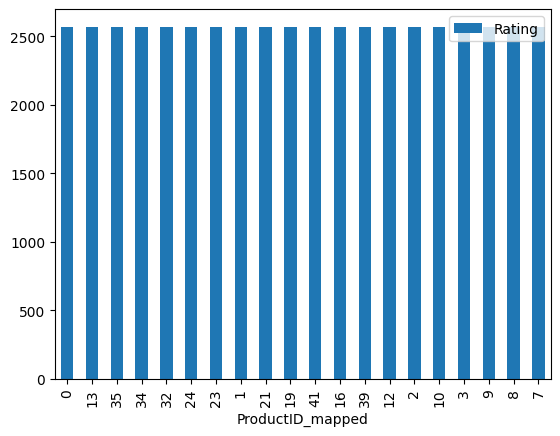

In [ ]:
most_popular.head(20).plot(kind = "bar")

In [ ]:
# performed MLP(MultiLayered Perceptron) for better recommendation
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from keras.models import Model
from sklearn.metrics import mean_squared_error
import numpy as np

# Taking the relevant columns i.e. 'CustomerID', 'Product', and 'Rating' columns


# Verify the number of unique products
num_products = len(product_encoder.classes_)
print("Number of unique products:", num_products)

# Define input layers for modified user and product IDs
user_input = Input(shape=(1,))
product_input = Input(shape=(1,))

# Define embedding layers for modified user and product IDs
embedding_size = 50
user_embedding = Embedding(num_users, embedding_size)(user_input)
product_embedding = Embedding(num_products, embedding_size)(product_input)

# Flatten the embeddings
user_flatten = Flatten()(user_embedding)
product_flatten = Flatten()(product_embedding)

# Concatenate modified user and product embeddings
concat = Concatenate()([user_flatten, product_flatten])

# Define neural network layers
dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1)(dense2)

# Create and compile the model
model = Model(inputs=[user_input, product_input], outputs=output)
model.compile(loss='mean_squared_error', optimizer='adam')

# Extract necessary columns
user_ids = df['CustomerID_mapped'].values
product_ids = df['ProductID_mapped'].values
ratings = df['Rating'].values.astype(float)  # Ensure ratings are continuous

# Split the data into training and testing sets
user_ids_train, user_ids_test, product_ids_train, product_ids_test, ratings_train, ratings_test = \
    train_test_split(df['CustomerID_mapped'].values, df['ProductID_mapped'].values, ratings, test_size=0.2, random_state=42)

# Train the model
model.fit([user_ids_train, product_ids_train], ratings_train, batch_size=64, epochs=10, validation_split=0.2)

# Evaluate the model on the testing set
predictions = model.predict([user_ids_test, product_ids_test]).flatten()

# Calculate Mean Squared Error(As performing regression)
mse = mean_squared_error(ratings_test, predictions)
print("Mean Squared Error on Testing Set:", mse)




Number of unique products: 44
Epoch 1/10
1130/1130 [==============================] - 12s 7ms/step - loss: 2.0799 - val_loss: 1.8670
Epoch 2/10
1130/1130 [==============================] - 5s 5ms/step - loss: 0.7262 - val_loss: 2.0467
Epoch 3/10
1130/1130 [==============================] - 5s 5ms/step - loss: 0.2269 - val_loss: 1.9253
Epoch 4/10
1130/1130 [==============================] - 6s 5ms/step - loss: 0.1486 - val_loss: 1.9559
Epoch 5/10
1130/1130 [==============================] - 5s 5ms/step - loss: 0.0723 - val_loss: 1.9159
Epoch 6/10
1130/1130 [==============================] - 6s 5ms/step - loss: 0.0310 - val_loss: 1.9088
Epoch 7/10
1130/1130 [==============================] - 5s 5ms/step - loss: 0.0206 - val_loss: 1.9024
Epoch 8/10
1130/1130 [==============================] - 6s 5ms/step - loss: 0.0171 - val_loss: 1.9149
Epoch 9/10
1130/1130 [==============================] - 5s 5ms/step - loss: 0.0145 - val_loss: 1.9135
Epoch 10/10
707/707 [==============================

In [ ]:
df.head(2)

,OrderDate,OrderID,Delivery Date,CustomerID,Customer Age,Customer Gender,Location,Zone,Delivery Type,Product Category,...,Product,Unit Price,Shipping Fee,Order Quantity,Sale Price,Status,Reason,Rating,CustomerID_mapped,ProductID_mapped
0,2020-05-31,5136486,2020-06-04,230569424,57,M,Western,Zone 3,Express,Fashion,...,Fashion Girl's Dress Kids Children Newborn Bab...,125.0,10,2,125.0,Returned,Onsite -Description mismatch,2,110321,17
1,2020-05-31,5136457,2020-06-12,230568182,24,F,Western,Zone 3,Standard Delivery,Health and beauty,...,Blood Pressure Monitor Digital Wrist BP Pulse ...,63.2,4,7,63.2,Returned,Product - Not fitting expectation,2,109079,8


In [ ]:
import numpy as np
predictions = model.predict([user_ids_test, product_ids_test])
mse = mean_squared_error(ratings_test, predictions)
rmse = np.sqrt(mse)

# The range of ratings
min_rating = np.min(ratings_test)
max_rating = np.max(ratings_test)
rating_range = max_rating - min_rating

#The percentage of error reduction compared to the range of ratings
accuracy_percentage = (1 - (rmse / rating_range)) * 100
print("Accuracy Score (RMSE) on Testing Set:", accuracy_percentage, "%" + " and RMSE is :",rmse)



707/707 [==============================] - 1s 2ms/step
Accuracy Score (RMSE) on Testing Set: 65.30821912825193 % and RMSE is : 1.3876712348699225


In [ ]:
def suggest_products(product_id, n):
    unique_products = df['ProductID_mapped'].unique()
    unique_products = unique_products[unique_products != product_id]
    placeholder_user_id = df['CustomerID_mapped'].iloc[0]
    user_array = np.array([placeholder_user_id] * len(unique_products))

    # Predict ratings
    predicted_ratings = model.predict([user_array, unique_products])

    # Sort predicted ratings in descending order
    sorted_indices = np.argsort(predicted_ratings[:, 0])[::-1]

    # Get top N similar products
    similar_product_indices = sorted_indices[:n]
    suggested_product_ids = unique_products[similar_product_indices]
    suggested_product_ratings = predicted_ratings[similar_product_indices]

    # Decode the product IDs back to their original values
    suggested_products = product_encoder.inverse_transform(suggested_product_ids)
    return suggested_products, suggested_product_ratings


product_id_input = int(input("Enter the Product ID: "))
n = int(input("Enter the number of suggestions you want: "))

if 0 <= product_id_input < num_products:
    # Get the product name for the entered product ID
    product_name_input = df.loc[df['ProductID_mapped'] == product_id_input, 'Product'].values[0]

    # Get suggestions
    suggested_products, suggested_ratings = suggest_products(product_id_input, n)
    print("Based on the Ratings :")
    print(f"Suggested products for product ID {product_id_input} (Product: {product_name_input}):")
    for product, rating in zip(suggested_products, suggested_ratings):
        print(f"Product ID: {product_encoder.transform([product])[0]}, Product Name: {product}")
else:
    print("Invalid product ID entered.")


Enter the Product ID: 2
Enter the number of suggestions you want: 2
2/2 [==============================] - 0s 12ms/step
Based on the Ratings :
Suggested products for product ID 2 (Product: 6030 3.1 Bluetooth Home Theatre With Remote Control - Black + Free Smartwatch):
Product ID: 26, Product Name: M4 Smart Bracelet Sports Pedometer Watch
Product ID: 5, Product Name: Amazon Fire HD 8 Kids Tablet 32GB HDD - 2GB RAM - 8" Blue


In [ ]:
def suggest_products(product_id, n):
    unique_users = df['CustomerID_mapped'].unique()

    product_array = np.array([product_id] * len(unique_users))
    predicted_ratings = model.predict([unique_users, product_array])
    top_user_indices = np.argsort(predicted_ratings[:, 0])[-n:]
    suggested_user_ids = unique_users[top_user_indices]
    suggested_users = user_encoder.inverse_transform(suggested_user_ids)
    return suggested_users

product_id_input = int(input("Enter the Product ID : "))
n=int(input("Enter the number of Suggestions you want : "))
suggested_users = suggest_products(product_id_input, n)
print("Suggested users for product ID", product_id_input, ":", suggested_users)

Enter the Product ID : 2
Enter the number of Suggestions you want : 3
3532/3532 [==============================] - 5s 2ms/step
Suggested users for product ID 2 : [230561308 230505767 230533977]


In [ ]:
model=model.save("recsys360.h5")